In [1179]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns

In [1180]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

In [1181]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
crime = pd.read_csv(path)

**I created a dataframe to hold the following features and the target variable - property crime:** 
-  'population' (Continuous)
-  'population_squared' (Continuous)
-  'murder' (Categorical)
-  'robbery' (Categorical)

In [1182]:
pd.options.mode.chained_assignment = None

crime.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson']
crime.drop(labels=[0,1,2,3,352,353,354],axis=0,inplace=True)

pcmodel = crime[['murder','population','property_crime','robbery']]
columns = list(pcmodel.columns)
for column in columns:
    pcmodel[column]=pcmodel[column].str.replace(',','')
pcmodel = pcmodel.apply(pd.to_numeric)

pcmodel['population_squared']=pcmodel['population']**2
pcmodel['murder']=pcmodel['murder'].apply(lambda x: 0 if x <= 0 else 1)
pcmodel['robbery']=pcmodel['robbery'].apply(lambda x: 0 if x <= 0 else 1)

pcmodel.dropna(inplace=True)
pcmodel.head()

,murder,population,property_crime,robbery,population_squared
4,0,1861,12,0,3463321
5,0,2577,24,0,6640929
6,0,2846,16,0,8099716
7,1,97956,4090,1,9595377936
8,0,6388,223,1,40806544


In [1183]:
pcmodel.describe()

,murder,population,property_crime,robbery,population_squared
count,348.000000,3.480000e+02,348.000000,348.000000,3.480000e+02
mean,0.140805,4.003763e+04,792.606322,0.600575,2.035547e+11
std,0.348321,4.500374e+05,7659.724746,0.490486,3.778876e+12
min,0.000000,5.260000e+02,0.000000,0.000000,2.766760e+05
25%,0.000000,3.003000e+03,40.500000,0.000000,9.018117e+06
50%,0.000000,7.233500e+03,112.500000,1.000000,5.232568e+07
75%,0.000000,1.842750e+04,341.000000,1.000000,3.397536e+08
max,1.000000,8.396126e+06,141971.000000,1.000000,7.049493e+13


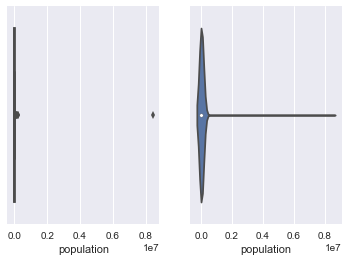

In [1184]:
plt.subplot(121)
population = sns.boxplot(pcmodel['population'])
plt.subplot(122)
population = sns.violinplot(pcmodel['population'])

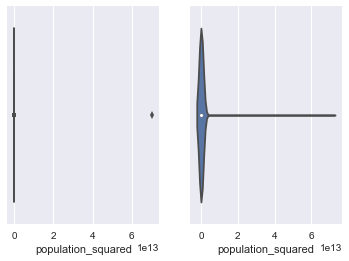

In [1185]:
plt.subplot(121)
population_squared = sns.boxplot(pcmodel['population_squared'])
plt.subplot(122)
population = sns.violinplot(pcmodel['population_squared'])

**There are extreme outliers (much more densely populated cities).**

In [1186]:
columns = list(pcmodel[['population','population_squared']].columns)
for column in columns: 
    q25 = pcmodel[column].quantile(0.25)
    q75 = pcmodel[column].quantile(0.75)
    iqr = q75 - q25
    max = q75 + (iqr * 1.5)
    pcmodel=pcmodel.where(pcmodel[column] < max)

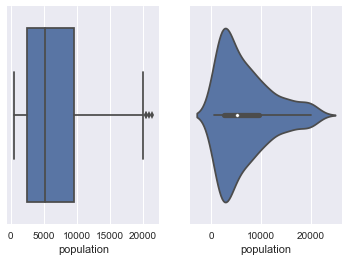

In [1187]:
plt.subplot(121)
population = sns.boxplot(pcmodel['population'])
plt.subplot(122)
population = sns.violinplot(pcmodel['population'])

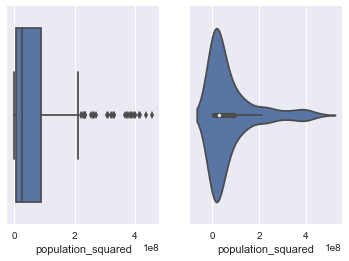

In [1188]:
plt.subplot(121)
population_squared = sns.boxplot(pcmodel['population_squared'])
plt.subplot(122)
population_squared = sns.violinplot(pcmodel['population_squared'])

In [1189]:
pcmodel.describe()

,murder,population,property_crime,robbery,population_squared
count,274.000000,274.000000,274.000000,274.000000,2.740000e+02
mean,0.051095,6730.492701,130.014599,0.500000,7.301594e+07
std,0.220594,5274.271168,151.249060,0.500915,1.039372e+08
min,0.000000,526.000000,0.000000,0.000000,2.766760e+05
25%,0.000000,2467.750000,31.000000,0.000000,6.089970e+06
50%,0.000000,5133.500000,73.500000,0.500000,2.635293e+07
75%,0.000000,9517.000000,171.000000,1.000000,9.057329e+07
max,1.000000,21397.000000,949.000000,1.000000,4.578316e+08
